In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, 
                            recall_score, f1_score, confusion_matrix)

In [3]:

# Load data
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [5]:
# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

# Unigram


=== Top 4 Models of Unigram ===
| Classifier          | N-Gram      |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|:------------|-----------:|------------:|---------:|---------:|
| Naive Bayes         | Unigram (U) |   0.983857 |    0.958333 | 0.92     | 0.938776 |
| SVM                 | Unigram (U) |   0.980269 |    0.992308 | 0.86     | 0.921429 |
| Logistic Regression | Unigram (U) |   0.977578 |    1        | 0.833333 | 0.909091 |
| Random Forest       | Unigram (U) |   0.976682 |    0.992063 | 0.833333 | 0.905797 |


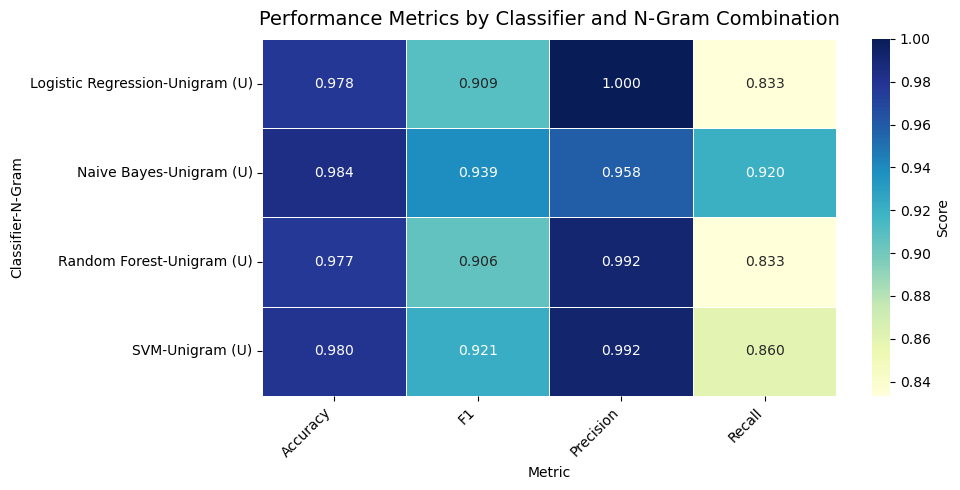

In [8]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'Unigram (U)': (1, 1)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Unigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=10, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Bigram


=== Top 4 Models of Bigram ===
| Classifier          | N-Gram     |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|:-----------|-----------:|------------:|---------:|---------:|
| Naive Bayes         | Bigram (B) |   0.980269 |    0.992308 | 0.86     | 0.921429 |
| Random Forest       | Bigram (B) |   0.955157 |    0.990196 | 0.673333 | 0.801587 |
| SVM                 | Bigram (B) |   0.952466 |    1        | 0.646667 | 0.785425 |
| Logistic Regression | Bigram (B) |   0.946188 |    1        | 0.6      | 0.75     |


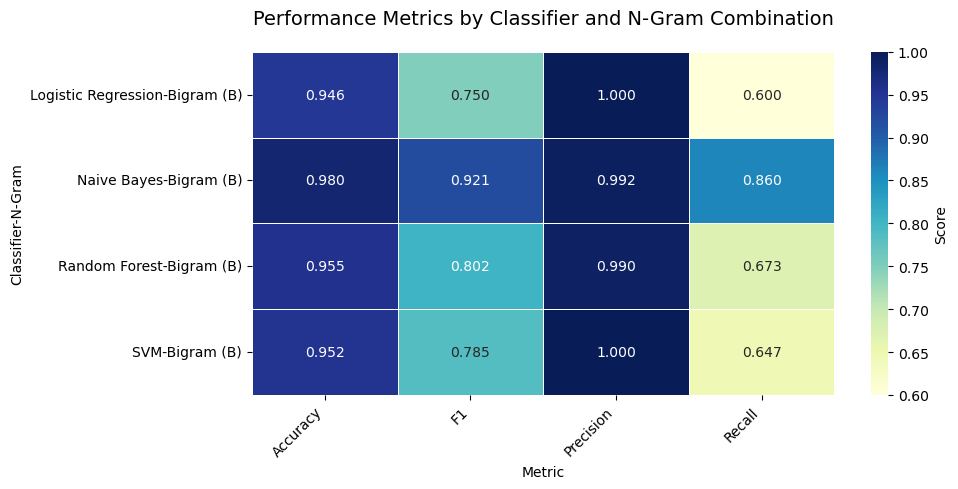

In [10]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'Bigram (B)': (2, 2)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Bigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Trigram


=== Top 4 Models of Trigram ===
| Classifier          | N-Gram      |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|:------------|-----------:|------------:|---------:|---------:|
| Naive Bayes         | Trigram (T) |   0.955157 |           1 | 0.666667 | 0.8      |
| SVM                 | Trigram (T) |   0.943498 |           1 | 0.58     | 0.734177 |
| Random Forest       | Trigram (T) |   0.939013 |           1 | 0.546667 | 0.706897 |
| Logistic Regression | Trigram (T) |   0.934529 |           1 | 0.513333 | 0.678414 |


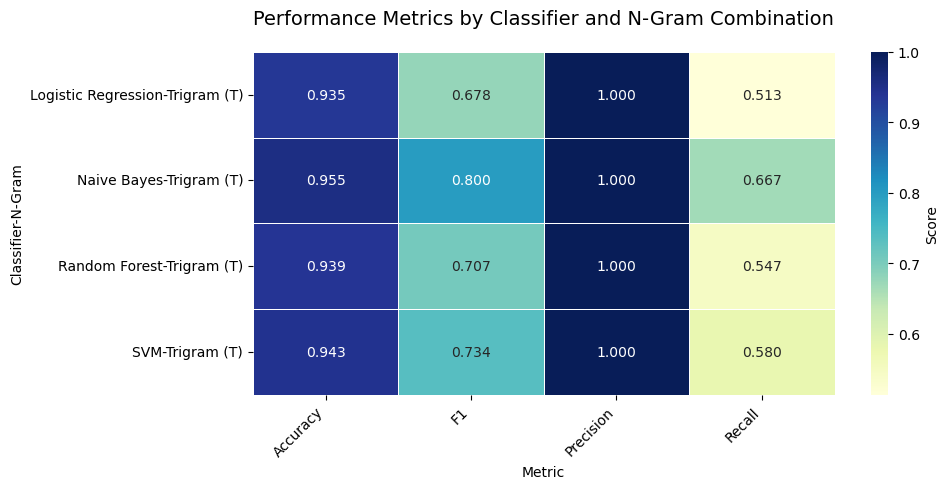

In [12]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'Trigram (T)': (3, 3)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Trigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Unigram + Bigram


=== Top 4 Models of Unigram + Bigram ===
| Classifier          | N-Gram   |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|:---------|-----------:|------------:|---------:|---------:|
| Naive Bayes         | U+B      |   0.984753 |    0.971631 | 0.913333 | 0.941581 |
| SVM                 | U+B      |   0.979372 |    1        | 0.846667 | 0.916968 |
| Logistic Regression | U+B      |   0.975785 |    1        | 0.82     | 0.901099 |
| Random Forest       | U+B      |   0.969507 |    1        | 0.773333 | 0.87218  |


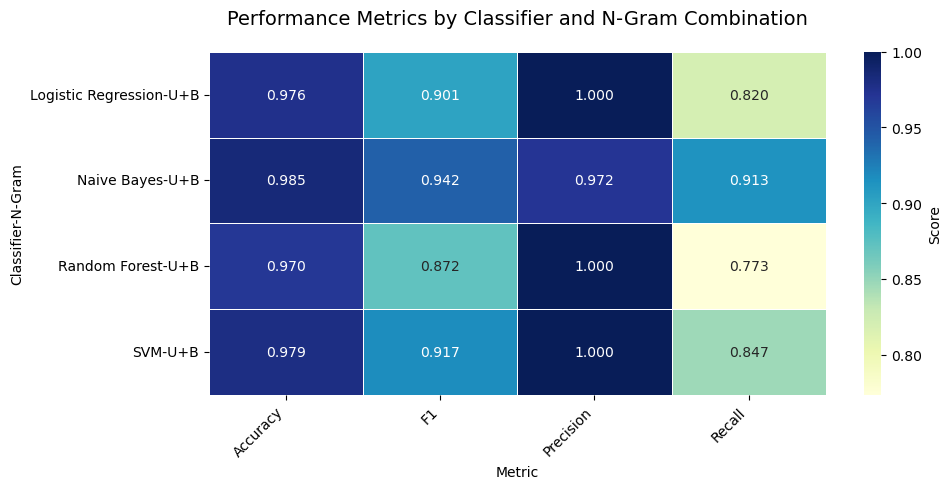

In [14]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'U+B': (1, 2)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Unigram + Bigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Unigram + Trigram


=== Top 4 Models of Unigram + Trigram ===
| Classifier          | N-Gram   |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|:---------|-----------:|------------:|---------:|---------:|
| Naive Bayes         | U+T      |   0.983857 |    0.971429 | 0.906667 | 0.937931 |
| Logistic Regression | U+T      |   0.973991 |    1        | 0.806667 | 0.892989 |
| SVM                 | U+T      |   0.973991 |    1        | 0.806667 | 0.892989 |
| Random Forest       | U+T      |   0.965022 |    1        | 0.74     | 0.850575 |


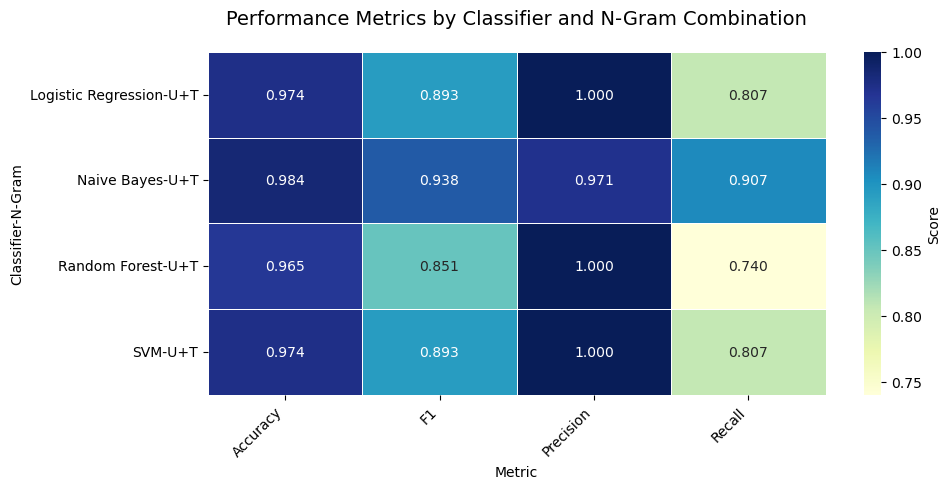

In [16]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'U+T': (1, 3)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Unigram + Trigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Bigram + Trigram


=== Top 4 Models of Bigram + Trigram ===
| Classifier          | N-Gram   |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|:---------|-----------:|------------:|---------:|---------:|
| Naive Bayes         | B+T      |   0.980269 |    0.992308 | 0.86     | 0.921429 |
| Random Forest       | B+T      |   0.949776 |    1        | 0.626667 | 0.770492 |
| SVM                 | B+T      |   0.947085 |    1        | 0.606667 | 0.755187 |
| Logistic Regression | B+T      |   0.945291 |    1        | 0.593333 | 0.74477  |


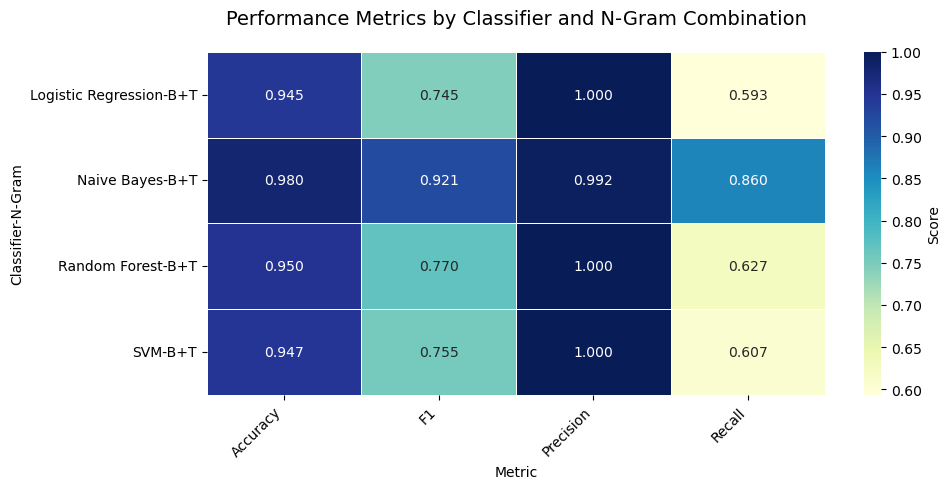

In [18]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'B+T': (2, 3)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Bigram + Trigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# Unigram + Bigram + Trigram


=== Top 4 Models of Unigram + Bigram + Trigram ===
| Classifier          | N-Gram   |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|:---------|-----------:|------------:|---------:|---------:|
| Naive Bayes         | U+B+T    |   0.983857 |    0.971429 | 0.906667 | 0.937931 |
| Logistic Regression | U+B+T    |   0.973991 |    1        | 0.806667 | 0.892989 |
| SVM                 | U+B+T    |   0.973991 |    1        | 0.806667 | 0.892989 |
| Random Forest       | U+B+T    |   0.964126 |    1        | 0.733333 | 0.846154 |


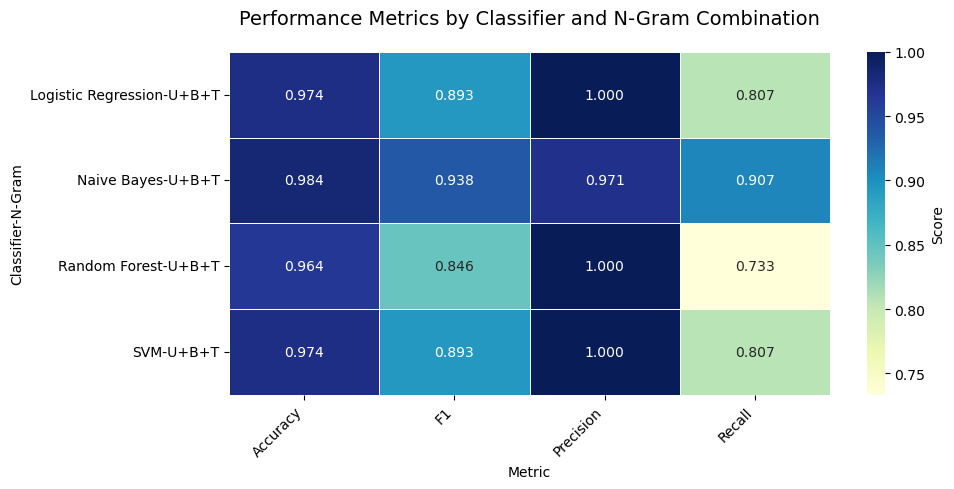

In [20]:

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
# N-gram combinations
ngram_configs = {
    'U+B+T': (1,3)
    
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 4 Models of Unigram + Bigram + Trigram ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# All in One N_Grams (Unigram , Bigram , Trigram , U+B , U+T , B+T , U+B+T ) 

In [ ]:


# Load data
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

# Classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# N-gram combinations
ngram_configs = {
    'Unigram (U)': (1, 1),
    'Bigram (B)': (2, 2),
    'Trigram (T)': (3, 3),
    'U+B': (1, 2),
    'U+T': (1, 3),
    'B+T': (2, 3),
    'U+B+T': (1, 3)
}

# Store results
results = []

# Process each classifier and n-gram
for clf_name, clf in classifiers.items():
    for ngram_name, ngram_range in ngram_configs.items():
        # Vectorize text
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X_train = vectorizer.fit_transform(train_texts)
        clf.fit(X_train, train_labels)
        
        # Predictions
        X_test = vectorizer.transform(test_texts)
        y_pred = clf.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(test_labels, y_pred)
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        
        # Store results
        results.append({
            'Classifier': clf_name,
            'N-Gram': ngram_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print top models
print("\n=== Top 5 Models ===")
print(results_df.sort_values(by='F1', ascending=False).head(5).to_markdown(index=False))

# Melt for visualization
melted_df = pd.melt(results_df, 
                    id_vars=['Classifier', 'N-Gram'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                    var_name='Metric',
                    value_name='Score')

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap_data = melted_df.pivot_table(
    index=['Classifier', 'N-Gram'],
    columns='Metric',
    values='Score'
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

plt.title('Performance Metrics by Classifier and N-Gram Combination', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
results_df.to_csv('spam_detection_metrics.csv', index=False)

# 1. Performance Summary Statistics


In [ ]:
# Calculate mean metrics across all n-grams for each classifier
summary_stats = results_df.groupby('Classifier').agg({
    'Accuracy': 'mean',
    'Precision': 'mean',
    'Recall': 'mean',
    'F1': 'mean'
}).sort_values(by='F1', ascending=False)

print("\n=== Classifier Performance Summary ===")
print(summary_stats.to_markdown(floatfmt=".3f"))

# Best Model Identification

In [ ]:
best_overall = summary_stats.idxmax()
print("\n=== Best Classifier by Metric ===")
print(best_overall.to_markdown())